# Analyze the quality of raw piezo-electric (vibration) signal as good/bad

**Data is collected from nearly one thousand sleep sessions represented as a single column CSV file**

**Each example represents one minute of sleep (sampled at 1000Hz)effectively measured for Heart Rate Variability**

## Data Exploration

One of the first things we do as in conducting Data Science is to visualize the data. I've isolated a good sensor read and a bad (noisy) sensor read file for data exploration, and a quick compare and contrast. 

In [5]:
import pandas as pd
import pandas.io.common

# Each file has 70,000 readings with a sequence number and a reading value; hence column names
colnames=['SeqNo', 'Reading'] 

# Create pandas dataframes one for good reads:dfG, and bad reads(noisy):dfB
dfG = pd.DataFrame()
dfG = pd.read_csv('GoodData_1573839630_1573839690.csv', names=colnames, header=None, index_col=False)
dfG.reset_index(drop=True, inplace=True)
print("\nLength of the Good Reads dataframe : ", len(dfG))
print("\nDescriptive Stats of the good reads dataframe : \n", dfG['Reading'].describe())
print ("\nHead of Good Reads data frame : \n")
dfG.head()


Length of the Good Reads dataframe :  61000

Descriptive Stats of the good reads dataframe : 
 count    61000.000000
mean      2023.225459
std        292.264114
min          0.000000
25%       1880.000000
50%       2033.000000
75%       2167.000000
max       4053.000000
Name: Reading, dtype: float64

Head of Good Reads data frame : 



,SeqNo,Reading
0,0,2100.0
1,1,2090.0
2,2,2070.0
3,3,2055.0
4,4,2037.0


In [7]:
# Same as above but now visualize the bad (noisy) readings file including descriptive statistics
dfB = pd.DataFrame()
dfB = pd.read_csv('BadData_1573753230_1573753290.csv', names=colnames, header=None,index_col=False)
dfB.reset_index(drop=True, inplace=True)
print("\nLength of the Bad Reads dataframe  : ", len(dfB))
print("\nDescriptive Stats of the bad reads dataframe : \n", dfB['Reading'].describe())
print ("\nHead of Bad Reads data frame : \n")
dfB.head()


Length of the Bad Reads dataframe  :  61000

Descriptive Stats of the bad reads dataframe : 
 count    61000.000000
mean      2023.224689
std         71.658230
min       1537.000000
25%       1978.000000
50%       2023.000000
75%       2068.000000
max       2723.000000
Name: Reading, dtype: float64

Head of Bad Reads data frame : 



,SeqNo,Reading
0,0,2027.0
1,1,2043.0
2,2,2062.0
3,3,2073.0
4,4,2093.0


**Even better is to visualize the 2D plot of the readings (hertz) sequentially**

(looks like continuous vibrations recorded almost 3 times a second)

**We can clearly see the difference between good & noisy readings; the former(blue)resembles the familiar EKG recording**

(gives me a clue that the frequency of recorded events may be a way to readily distinguish between good & a noisy signal)

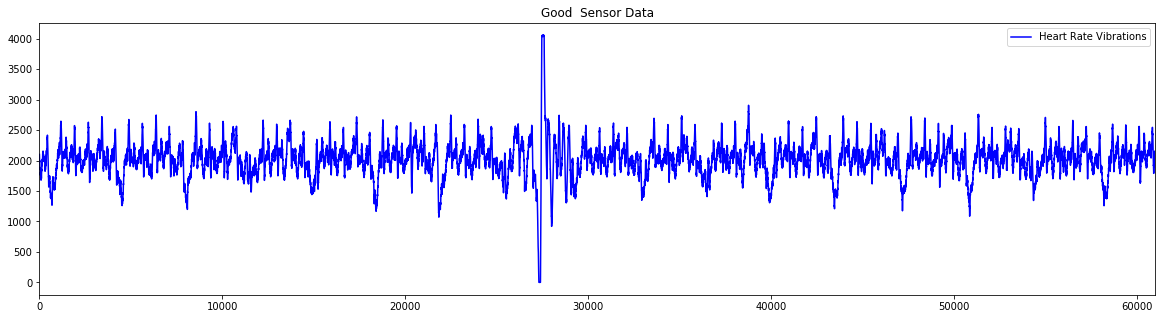

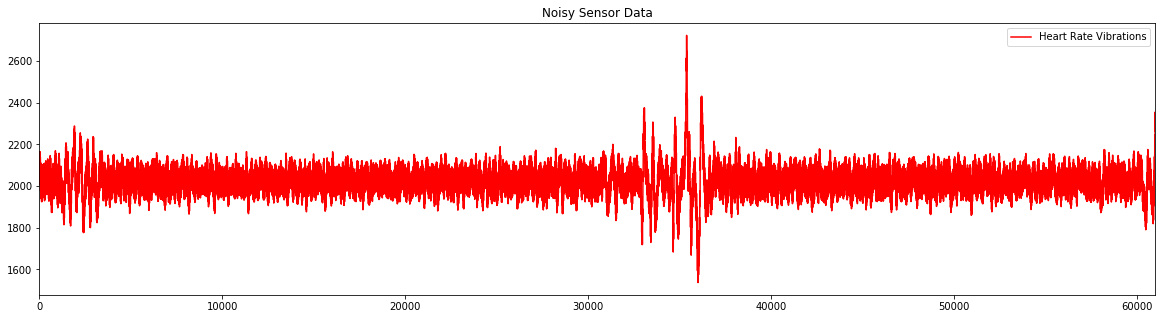

In [9]:
import matplotlib
from matplotlib import pyplot as plt

dfG.plot.line(y=1, label='Heart Rate Vibrations', title='Good  Sensor Data', figsize=(20,5),color='b')
dfB.plot.line(y=1, label='Heart Rate Vibrations', title='Noisy Sensor Data',figsize=(20,5), color='r')
plt.show()

### Histograms do offer more clues as a pattern of distribution of frequencies

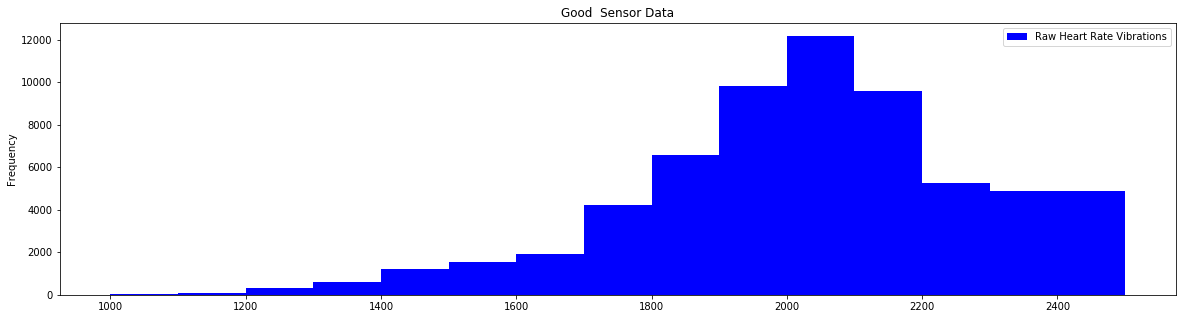

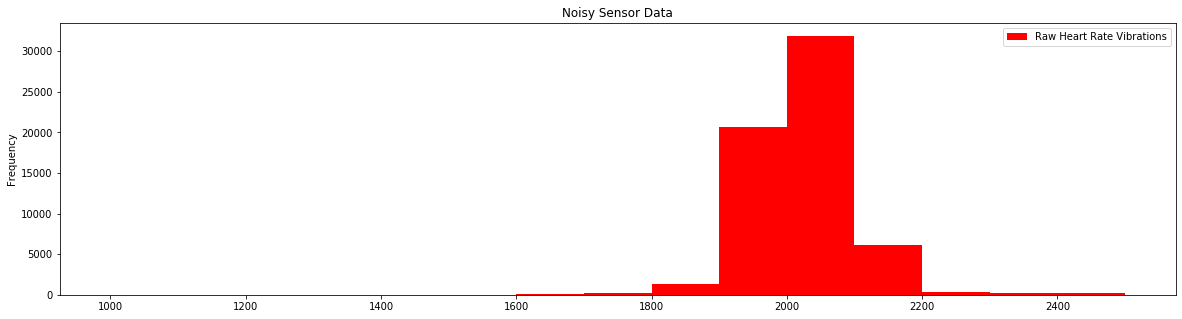

In [10]:
dfG.plot.hist(y=1, 
              bins = [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2500],
              label='Raw Heart Rate Vibrations',
              title='Good  Sensor Data', 
              figsize=(20,5), 
              color='b')

dfB.plot.hist(y=1, 
              bins = [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2500],
              label='Raw Heart Rate Vibrations', 
              title='Noisy Sensor Data',
              figsize=(20,5), 
              color='r')
plt.show()

### Get all the data, engineer features & label the data as good or bad (noisy)

In [13]:
# load mapping files
from os import listdir
import glob
import pandas as pd
import pandas.io.common
import numpy as np

###################################################################
# Create a function to iterate through each file in the directory 
###################################################################
colnames=['SeqNo', 'Reading']
def construct_dataframe(path):
    allFiles = []
    # First get the list of all the files
    for fname in glob.glob(path+'/**/*.csv', recursive=True):
        allFiles.append(fname)
    print("Number of Sensor Reading Files (",path,") : ", len(allFiles))

    lst = [] 
    # Load each file into a pandas DdataFrame & then into NumPy arrays for data pre-processing
    for filename in allFiles:
        try:
            df  = pd.read_csv(filename, names=colnames, header=None, index_col=False)
            arr = df['Reading'].to_numpy()            
            # Bin the data using histogram function of NumPy
            tup = np.histogram(arr, 
                    bins=[1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2500,2600])
            lst.append([i for t in tup for i in t][:15])
        except pandas.io.common.EmptyDataError:
          print(filename, " is empty and has been skipped.")

    # Attach the Classification of Sensor Data as either good or bad
    for x in range(len(lst)):
        lst[x].append(path)

    # Feature Engineering (binning the recording of the range of vibrations (in Hertz))
    dfSensorData = pd.DataFrame(lst, 
                  columns=['B0','B1','B2','B3','B4','B5','B6','B7','B8','B9','BA','BB','BC','BD','BE','CLASS'])
        
    return dfSensorData 

#############################################################################
# Call the above function & load the good & noisy data into separate frames
#############################################################################
dfB = construct_dataframe('bad')
dfG = construct_dataframe('good')


Number of Sensor Reading Files ( bad ) :  565
Number of Sensor Reading Files ( good ) :  336


In [21]:
print('Rows x Columns of dataframe that contains NOISY sensor readings is : ', dfB.shape)
print('Rows x Columns of dataframe that contains GOOD  sensor readings is : ', dfG.shape)

Rows x Columns of dataframe that contains NOISY sensor readings is :  (565, 16)
Rows x Columns of dataframe that contains GOOD  sensor readings is :  (336, 16)


In [22]:
# Concatenate both the dataframes 
dfX = pd.concat([dfG,dfB],axis=0)
print('Rows x Columns of dataframe that contains ALL  sensor readings is : ', dfX.shape)

Rows x Columns of dataframe that contains ALL  sensor readings is :  (901, 16)


In [23]:
dfX.head()

,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9,BA,BB,BC,BD,BE,CLASS
0,0,0,0,0,0,0,0,0,23,9151,36208,11261,3531,826,0,good
1,0,0,0,0,0,0,0,244,1964,6545,28684,22732,831,0,0,good
2,0,0,0,0,0,0,0,156,5574,15114,20146,12175,5576,2259,0,good
3,0,0,0,0,0,0,197,1687,6950,11389,20488,10149,4390,5361,262,good
4,0,0,0,0,0,0,0,12,1585,12863,30257,12997,2288,998,0,good


In [24]:
# Shuffle the original Dataframe & copy to a new one & reset the index
dfY = dfX.sample(frac=1).reset_index(drop=True)

In [25]:
dfY.head()

,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9,BA,BB,BC,BD,BE,CLASS
0,0,0,0,0,0,0,0,0,0,0,61000,0,0,0,0,bad
1,0,0,0,0,0,0,0,0,78,5342,40808,12493,2035,244,0,good
2,0,10,312,328,527,704,852,1470,2527,4914,33421,8216,2832,3038,622,bad
3,0,0,0,0,0,0,0,0,0,251,56321,4428,0,0,0,bad
4,0,0,0,0,0,0,0,0,0,0,61000,0,0,0,0,bad


### Prepare the data for exercising a ML classifier

In [26]:
#######################################
# FEATURE SELECTION (X, Y)
#######################################

# Select the following 15 features as X (array) - numerical data (binned)
X = dfY[['B0','B1','B2','B3','B4','B5','B6','B7','B8','B9','BA','BB','BC','BD','BE']]
# Select the corresponding feature which is the classification of sensor data as good or bad
Y = dfY['CLASS']

In [27]:
#######################################
# SPLIT THE TRAINING & TESTING DATASETS
#######################################

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split the dataset as training & testing (80/20 split)
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X, Y, test_size=0.2, random_state=4)

In [28]:
# Print the shape of the resulting datasets (dataframes)
print("\nSize of the training dataset is ", X_trn.shape)
print("\nSize of the testing  dataset is ", X_tst.shape)


Size of the training dataset is  (720, 15)

Size of the testing  dataset is  (181, 15)


In [29]:
# Print the head of training data (independent variables)
print("\n The 15 features selected to create model are : \n")
X_trn.head(3)


 The 15 features selected to create model are : 



,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9,BA,BB,BC,BD,BE
215,0,0,0,0,0,40,403,3116,5907,10879,21686,15063,3585,321,0
401,0,0,0,0,0,101,472,982,2583,8238,19168,18517,7801,3068,70
413,0,0,45,28,112,204,278,907,2301,12665,20816,15368,6055,1902,134


In [30]:
print("\n The dependent variable used to fit the model : \n") 
Y_trn.head(3)


 The dependent variable used to fit the model : 



215    bad
401    bad
413    bad
Name: CLASS, dtype: object

### Use Support Vector Machine (SVM) to classify the sensor data as good or bad(noisy)

In [31]:
# Import Support Vector Machine from sklearn
from sklearn import svm

# Instantiate a classifier & use the default Radial Basis Function (RBF), a kernel method
modelSVM = svm.SVC(kernel='rbf', gamma='auto')

# Print the characteristics of the classifier (clf) model
print("\n\n The characteristics of instantiated model are :", modelSVM)

# Fit the Training data to the classifier model (Y_trn) specifies the number of classes
modelSVM.fit(X_trn, Y_trn)

print( "\n\n Classes used by the classifier are : ", modelSVM.classes_ )

# Make the prediction
Y_svm = modelSVM.predict(X_tst)
print ("\n\n Created a prediction set using the Support Vector Machine classifier \n")



 The characteristics of instantiated model are : SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


 Classes used by the classifier are :  ['bad' 'good']


 Created a prediction set using the Support Vector Machine classifier 



**Evaluate Accuracy of the Classifier (SVM model)**

In [32]:
from sklearn import metrics
from sklearn.metrics import classification_report


# Compute Accuracy
print("\n\n Accuracy of the Support Vector Machine(SVM) model is: ", 
        metrics.accuracy_score(Y_tst, Y_svm))



 Accuracy of the Support Vector Machine(SVM) model is:  0.6243093922651933


### Use Logistic Regression (LoR) to classify the data to see if the model performs any better

In [33]:
from sklearn.linear_model import LogisticRegression

modelLOR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trn,Y_trn)
print("\n\n The Logistic Regression Model Parameters are : ", modelLOR, "\n\n")

# Make predictions
Y_lor = modelLOR.predict(X_tst)
print("\n\n First few of the predictictions are : ", Y_lor[:5], "\n\n")




 The Logistic Regression Model Parameters are :  LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) 




 First few of the predictictions are :  ['bad' 'bad' 'bad' 'good' 'good'] 




**Evaluate the accuracy of the classifier(LoR model)**

In [34]:
# Compute Accuracy
print("\n\n Accuracy of the Logistic Regression Model is: ", 
        metrics.accuracy_score(Y_tst, Y_lor))



 Accuracy of the Logistic Regression Model is:  0.7237569060773481


**What we've accomplished thus far is to be able to use an ML classifiers (SVM & LoR) to classify the data as good data or bad data with ~62-72% accuracy! CLEARLY LOGISTIC REGRESSION IS A BETTER MODEL but we would need a Confusion Matrix to study the sensitivity & specificity of the model. There's more that can be done in the sense of fine-tuning the model, choosing a different model and comparing the accuracy**

## Bonus Exercise - Use the current model to classify the data in each file as good or bad 

In [36]:
#############################################################################
# Call the above function & load the good & noisy data into separate frames
#############################################################################
dfQ = construct_dataframe('questionable')

dfQ.head(11)

Number of Sensor Reading Files ( questionable ) :  11


,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9,BA,BB,BC,BD,BE,CLASS
0,0,0,0,0,0,0,0,38,1434,5720,32979,20739,90,0,0,questionable
1,0,0,0,0,0,0,69,2146,2824,11424,31823,22024,5255,435,0,questionable
2,0,0,0,0,0,0,0,0,0,643,49505,352,0,0,0,questionable
3,0,0,0,0,0,0,40,409,4635,9455,27089,14480,3014,1378,0,questionable
4,0,0,0,0,0,0,0,0,0,0,60626,374,0,0,0,questionable
5,0,0,0,0,0,0,1,55,1147,8125,41439,8289,444,0,0,questionable
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,questionable
7,0,0,0,0,0,0,0,0,0,5021,29611,23395,2473,0,0,questionable
8,0,0,0,0,0,21,109,383,1818,7421,26402,16551,1668,449,46,questionable
9,0,0,0,7,8,6,15,76,905,12017,31074,15667,1097,128,0,questionable


In [38]:
X_tst = dfQ[['B0','B1','B2','B3','B4','B5','B6','B7','B8','B9','BA','BB','BC','BD','BE']]

# Make predictions
Y_lor = modelLOR.predict(X_tst)
print("\n\n The predicticted values are : ", Y_lor[:11], "\n\n")




 First few of the predictictions are :  ['good' 'good' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good' 'good'] 




**According to the ML classifier, 7 out of 11 files in the questionable directory have good data & 4 have bad data**

This notebook is a mininum viable deliverable & can be improved further  

## This concludes the exercise  